# 联想笔试-0813

> by **黄桥** (Qiao Huang) <job@qiaohuang.me>
>
> 2022-08-13

**TOC:**

0. 准备
1. 去重
2. 连表并输出 Excel
3. Order_Type 比例
4. Order_Tpye 平均送达时间

## 0. 准备工作

In [1]:
# 准备第三方库，并简单设置

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']

In [2]:
# 读取 Excel 文件，并生成 DataFrame

df_usage, df_brand = pd.read_excel("笔试题目.xlsx", sheet_name=["Usage", "Brand"]).values()

In [3]:
# 预览 Usage 数据

df_usage.info()
df_usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Item_No                2028 non-null   int64         
 1   lenovo_SO              2028 non-null   int64         
 2   Order_type             2028 non-null   object        
 3   MTM                    2028 non-null   object        
 4   Ship_PN                2028 non-null   object        
 5   Qty                    2028 non-null   int64         
 6   Order_date             2028 non-null   datetime64[ns]
 7   Item_allocated_time    2028 non-null   datetime64[ns]
 8   Expect_Pick_time       1599 non-null   datetime64[ns]
 9   WH_handle_time         2028 non-null   datetime64[ns]
 10  WH_Pack_time           2028 non-null   datetime64[ns]
 11  WH_ship_time           2028 non-null   datetime64[ns]
 12  Courier_POD_time       2028 non-null   datetime64[ns]
 13  Cou

,Item_No,lenovo_SO,Order_type,MTM,Ship_PN,Qty,Order_date,Item_allocated_time,Expect_Pick_time,WH_handle_time,WH_Pack_time,WH_ship_time,Courier_POD_time,Courier_Delv_Time_RET,WH_Recv_time,Return_PN,Category,Product_Group
0,40,4000010242,Depot Order,20F5S88F00,01HX031,1,2020-03-19 16:32:19,2020-03-19 16:32:00,2020-03-20 16:00:00,2020-03-20 09:07:19,2020-03-20 09:22:40,2020-03-20 09:23:02,2020-03-23 09:00:00,2020-03-26 13:00:00,2020-03-27 11:27:23,01HX035,PLANAR,NaN
1,30,4000010912,Depot Order,20HGS18V00,01ER066,1,2020-03-23 11:17:23,2020-03-23 11:17:00,2020-03-23 16:00:00,2020-03-23 11:28:09,2020-03-23 11:28:27,2020-03-23 11:29:03,2020-03-24 09:00:00,2020-03-26 13:00:00,2020-03-27 11:35:07,01ER066,PLANAR,NaN
2,40,4000011420,Depot Order,20FAS6PN00,01AV462,1,2020-03-24 11:57:13,2020-03-24 11:57:00,2020-03-24 16:00:00,2020-03-24 12:16:58,2020-03-24 12:32:32,2020-03-24 12:33:01,2020-03-25 09:00:00,NaT,NaT,NaN,BATTERY,NaN
3,40,4000010242,Depot Order,20F5S88F00,01HX035,1,2020-03-19 16:32:19,2020-03-19 16:32:00,2020-03-20 16:00:00,2020-03-20 09:07:19,2020-03-20 09:22:40,2020-03-20 09:23:02,2020-03-23 09:00:00,2020-03-26 13:00:00,2020-03-27 11:27:23,01HX035,PLANAR,NaN
4,30,4000010912,Depot Order,20HGS18V00,01ER066,1,2020-03-23 11:17:23,2020-03-23 11:17:00,2020-03-23 16:00:00,2020-03-23 11:28:09,2020-03-23 11:28:27,2020-03-23 11:29:03,2020-03-24 09:00:00,2020-03-26 13:00:00,2020-03-27 11:35:07,01ER066,PLANAR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,30,4000015386,Depot Order,20FAS8BU00,00JT959,1,2020-04-06 12:07:18,2020-04-06 12:02:00,2020-04-06 16:00:00,2020-04-06 13:03:40,2020-04-06 13:03:53,2020-04-06 13:04:05,2020-04-07 09:00:00,2020-04-09 13:00:00,2020-04-13 16:16:52,00JT959,PLANAR,NaN
2024,50,4000014370,Depot Order,20FAS6PN00,00JT959,1,2020-04-07 13:03:10,2020-04-07 13:03:00,2020-04-07 16:00:00,2020-04-07 13:29:49,2020-04-07 13:45:43,2020-04-07 13:46:04,2020-04-07 17:45:00,2020-04-13 13:00:00,2020-04-13 17:43:33,00JT959,PLANAR,NaN
2025,60,4000014370,Depot Order,20FAS6PN00,01AV462,1,2020-04-07 13:03:10,2020-04-07 13:03:00,2020-04-07 16:00:00,2020-04-07 13:29:49,2020-04-07 13:45:43,2020-04-07 13:46:04,2020-04-07 17:45:00,2020-04-13 13:00:00,NaT,NaN,BATTERY,NaN
2026,40,4000015844,Depot Order,20LES3481L,02HL897,1,2020-04-07 13:22:16,2020-04-07 13:22:00,2020-04-07 16:00:00,2020-04-07 13:39:07,2020-04-07 14:02:01,2020-04-07 14:03:02,2020-04-08 10:00:00,NaT,NaT,NaN,KEYBOARD,NaN


In [4]:
# 预览 Brand 数据

df_brand.info()
df_brand

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MACH_TYPE      257 non-null    object
 1   BRAND          257 non-null    object
 2   Product_Group  257 non-null    object
dtypes: object(3)
memory usage: 6.1+ KB


,MACH_TYPE,BRAND,Product_Group
0,10AU,PCG THINK DESKTOP,Think
1,10BA,PCG THINK DESKTOP,Think
2,10FG,PCG THINK DESKTOP,Think
3,10FL,PCG THINK DESKTOP,Think
4,10FY,PCG THINK DESKTOP,Think
...,...,...,...
252,81U4,PCG LENOVO NOTEBOOK,Idea
253,81UE,PCG LENOVO NOTEBOOK,Idea
254,81UV,PCG LENOVO NOTEBOOK,Idea
255,ZA2D,MBG TABLET ANDROID,Idea


## 1. 以维修单号字段作为 key，对表格去重。

> 维修单号：Lenovo SO 和 Item_No
>
> 开单时间：Order_Date

In [5]:
# 传递参数 `keep=False`，筛选「维修单号字段」所有重复值
# 并按「开单时间」排序展示

df_usage[df_usage.duplicated(subset=['lenovo_SO', 'Item_No'], keep=False)] \
        .sort_values(['lenovo_SO', 'Item_No', 'Order_date'])

,Item_No,lenovo_SO,Order_type,MTM,Ship_PN,Qty,Order_date,Item_allocated_time,Expect_Pick_time,WH_handle_time,WH_Pack_time,WH_ship_time,Courier_POD_time,Courier_Delv_Time_RET,WH_Recv_time,Return_PN,Category,Product_Group
0,40,4000010242,Depot Order,20F5S88F00,01HX031,1,2020-03-19 16:32:19,2020-03-19 16:32:00,2020-03-20 16:00:00,2020-03-20 09:07:19,2020-03-20 09:22:40,2020-03-20 09:23:02,2020-03-23 09:00:00,2020-03-26 13:00:00,2020-03-27 11:27:23,01HX035,PLANAR,NaN
3,40,4000010242,Depot Order,20F5S88F00,01HX035,1,2020-03-19 16:32:19,2020-03-19 16:32:00,2020-03-20 16:00:00,2020-03-20 09:07:19,2020-03-20 09:22:40,2020-03-20 09:23:02,2020-03-23 09:00:00,2020-03-26 13:00:00,2020-03-27 11:27:23,01HX035,PLANAR,NaN
1,30,4000010912,Depot Order,20HGS18V00,01ER066,1,2020-03-23 11:17:23,2020-03-23 11:17:00,2020-03-23 16:00:00,2020-03-23 11:28:09,2020-03-23 11:28:27,2020-03-23 11:29:03,2020-03-24 09:00:00,2020-03-26 13:00:00,2020-03-27 11:35:07,01ER066,PLANAR,NaN
4,30,4000010912,Depot Order,20HGS18V00,01ER066,1,2020-03-23 11:17:23,2020-03-23 11:17:00,2020-03-23 16:00:00,2020-03-23 11:28:09,2020-03-23 11:28:27,2020-03-23 11:29:03,2020-03-24 09:00:00,2020-03-26 13:00:00,2020-03-27 11:35:07,01ER066,PLANAR,NaN
2,40,4000011420,Depot Order,20FAS6PN00,01AV462,1,2020-03-24 11:57:13,2020-03-24 11:57:00,2020-03-24 16:00:00,2020-03-24 12:16:58,2020-03-24 12:32:32,2020-03-24 12:33:01,2020-03-25 09:00:00,NaT,NaT,NaN,BATTERY,NaN
5,40,4000011420,Depot Order,20FAS6PN00,01AV462,1,2020-03-24 11:57:13,2020-03-24 11:57:00,2020-03-24 16:00:00,2020-03-24 12:16:58,2020-03-24 12:32:32,2020-03-24 12:33:01,2020-03-25 09:00:00,NaT,NaT,NaN,BATTERY,NaN


In [6]:
# 传递参数 `keep='first'`，只保留第一个重复值，其余去重

# df_usage.sort_values('Order_date') # 基于业务，可以选择保留初始订单或最近订单
# 这里不破环原表结构，直接去重

df_usage_deduplicated = \
    df_usage.drop_duplicates(subset=['lenovo_SO', 'Item_No'], keep='first')
df_usage_deduplicated

,Item_No,lenovo_SO,Order_type,MTM,Ship_PN,Qty,Order_date,Item_allocated_time,Expect_Pick_time,WH_handle_time,WH_Pack_time,WH_ship_time,Courier_POD_time,Courier_Delv_Time_RET,WH_Recv_time,Return_PN,Category,Product_Group
0,40,4000010242,Depot Order,20F5S88F00,01HX031,1,2020-03-19 16:32:19,2020-03-19 16:32:00,2020-03-20 16:00:00,2020-03-20 09:07:19,2020-03-20 09:22:40,2020-03-20 09:23:02,2020-03-23 09:00:00,2020-03-26 13:00:00,2020-03-27 11:27:23,01HX035,PLANAR,NaN
1,30,4000010912,Depot Order,20HGS18V00,01ER066,1,2020-03-23 11:17:23,2020-03-23 11:17:00,2020-03-23 16:00:00,2020-03-23 11:28:09,2020-03-23 11:28:27,2020-03-23 11:29:03,2020-03-24 09:00:00,2020-03-26 13:00:00,2020-03-27 11:35:07,01ER066,PLANAR,NaN
2,40,4000011420,Depot Order,20FAS6PN00,01AV462,1,2020-03-24 11:57:13,2020-03-24 11:57:00,2020-03-24 16:00:00,2020-03-24 12:16:58,2020-03-24 12:32:32,2020-03-24 12:33:01,2020-03-25 09:00:00,NaT,NaT,NaN,BATTERY,NaN
6,30,4000011556,Depot Order,20L9CTO1WW,01YR457,1,2020-03-24 15:27:12,2020-03-24 15:23:00,2020-03-24 16:00:00,2020-03-24 15:35:47,2020-03-24 15:36:17,2020-03-24 15:37:02,2020-03-25 11:00:00,NaT,NaT,NaN,MECHA,NaN
7,40,4000011435,Depot Order,20SC001LSG,5B20W72961,1,2020-03-25 12:53:41,2020-03-25 12:53:00,2020-03-25 16:00:00,2020-03-25 13:29:30,2020-03-25 13:35:58,2020-03-25 13:36:04,2020-03-26 09:00:00,2020-04-06 13:00:00,2020-04-08 18:48:14,5B20W72961,PLANAR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,30,4000015386,Depot Order,20FAS8BU00,00JT959,1,2020-04-06 12:07:18,2020-04-06 12:02:00,2020-04-06 16:00:00,2020-04-06 13:03:40,2020-04-06 13:03:53,2020-04-06 13:04:05,2020-04-07 09:00:00,2020-04-09 13:00:00,2020-04-13 16:16:52,00JT959,PLANAR,NaN
2024,50,4000014370,Depot Order,20FAS6PN00,00JT959,1,2020-04-07 13:03:10,2020-04-07 13:03:00,2020-04-07 16:00:00,2020-04-07 13:29:49,2020-04-07 13:45:43,2020-04-07 13:46:04,2020-04-07 17:45:00,2020-04-13 13:00:00,2020-04-13 17:43:33,00JT959,PLANAR,NaN
2025,60,4000014370,Depot Order,20FAS6PN00,01AV462,1,2020-04-07 13:03:10,2020-04-07 13:03:00,2020-04-07 16:00:00,2020-04-07 13:29:49,2020-04-07 13:45:43,2020-04-07 13:46:04,2020-04-07 17:45:00,2020-04-13 13:00:00,NaT,NaN,BATTERY,NaN
2026,40,4000015844,Depot Order,20LES3481L,02HL897,1,2020-04-07 13:22:16,2020-04-07 13:22:00,2020-04-07 16:00:00,2020-04-07 13:39:07,2020-04-07 14:02:01,2020-04-07 14:03:02,2020-04-08 10:00:00,NaT,NaT,NaN,KEYBOARD,NaN


## 2. 用维修机型字段前 4 位与 brand 表的 MACHINE_TYPE 列匹对，得到每个维修机器的 Product_Group 信息，更新在原表中。

> 维修机型：MTM
>
> 机型分类：MACHINE_TYPE
>
> 产线：Product_Group

In [7]:
# 去除原表空列
df_usage_match = df_usage_deduplicated.drop('Product_Group', axis=1).copy()

# 生成匹配列
df_usage_match['MACH_TYPE'] = df_usage_match['MTM'].str[:4]

In [8]:
# 左连接 Brand 表

df_joined = df_usage_match.join(df_brand.set_index('MACH_TYPE'), on='MACH_TYPE')

df_joined

,Item_No,lenovo_SO,Order_type,MTM,Ship_PN,Qty,Order_date,Item_allocated_time,Expect_Pick_time,WH_handle_time,WH_Pack_time,WH_ship_time,Courier_POD_time,Courier_Delv_Time_RET,WH_Recv_time,Return_PN,Category,MACH_TYPE,BRAND,Product_Group
0,40,4000010242,Depot Order,20F5S88F00,01HX031,1,2020-03-19 16:32:19,2020-03-19 16:32:00,2020-03-20 16:00:00,2020-03-20 09:07:19,2020-03-20 09:22:40,2020-03-20 09:23:02,2020-03-23 09:00:00,2020-03-26 13:00:00,2020-03-27 11:27:23,01HX035,PLANAR,20F5,PCG THINK NOTEBOOK,Think
1,30,4000010912,Depot Order,20HGS18V00,01ER066,1,2020-03-23 11:17:23,2020-03-23 11:17:00,2020-03-23 16:00:00,2020-03-23 11:28:09,2020-03-23 11:28:27,2020-03-23 11:29:03,2020-03-24 09:00:00,2020-03-26 13:00:00,2020-03-27 11:35:07,01ER066,PLANAR,20HG,PCG THINK NOTEBOOK,Think
2,40,4000011420,Depot Order,20FAS6PN00,01AV462,1,2020-03-24 11:57:13,2020-03-24 11:57:00,2020-03-24 16:00:00,2020-03-24 12:16:58,2020-03-24 12:32:32,2020-03-24 12:33:01,2020-03-25 09:00:00,NaT,NaT,NaN,BATTERY,20FA,PCG THINK NOTEBOOK,Think
6,30,4000011556,Depot Order,20L9CTO1WW,01YR457,1,2020-03-24 15:27:12,2020-03-24 15:23:00,2020-03-24 16:00:00,2020-03-24 15:35:47,2020-03-24 15:36:17,2020-03-24 15:37:02,2020-03-25 11:00:00,NaT,NaT,NaN,MECHA,20L9,PCG THINK NOTEBOOK,Think
7,40,4000011435,Depot Order,20SC001LSG,5B20W72961,1,2020-03-25 12:53:41,2020-03-25 12:53:00,2020-03-25 16:00:00,2020-03-25 13:29:30,2020-03-25 13:35:58,2020-03-25 13:36:04,2020-03-26 09:00:00,2020-04-06 13:00:00,2020-04-08 18:48:14,5B20W72961,PLANAR,20SC,PCG THINK NOTEBOOK,Think
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,30,4000015386,Depot Order,20FAS8BU00,00JT959,1,2020-04-06 12:07:18,2020-04-06 12:02:00,2020-04-06 16:00:00,2020-04-06 13:03:40,2020-04-06 13:03:53,2020-04-06 13:04:05,2020-04-07 09:00:00,2020-04-09 13:00:00,2020-04-13 16:16:52,00JT959,PLANAR,20FA,PCG THINK NOTEBOOK,Think
2024,50,4000014370,Depot Order,20FAS6PN00,00JT959,1,2020-04-07 13:03:10,2020-04-07 13:03:00,2020-04-07 16:00:00,2020-04-07 13:29:49,2020-04-07 13:45:43,2020-04-07 13:46:04,2020-04-07 17:45:00,2020-04-13 13:00:00,2020-04-13 17:43:33,00JT959,PLANAR,20FA,PCG THINK NOTEBOOK,Think
2025,60,4000014370,Depot Order,20FAS6PN00,01AV462,1,2020-04-07 13:03:10,2020-04-07 13:03:00,2020-04-07 16:00:00,2020-04-07 13:29:49,2020-04-07 13:45:43,2020-04-07 13:46:04,2020-04-07 17:45:00,2020-04-13 13:00:00,NaT,NaN,BATTERY,20FA,PCG THINK NOTEBOOK,Think
2026,40,4000015844,Depot Order,20LES3481L,02HL897,1,2020-04-07 13:22:16,2020-04-07 13:22:00,2020-04-07 16:00:00,2020-04-07 13:39:07,2020-04-07 14:02:01,2020-04-07 14:03:02,2020-04-08 10:00:00,NaT,NaT,NaN,KEYBOARD,20LE,PCG THINK NOTEBOOK,Think


In [9]:
# 生成最终结果，并输出为 Excel

df_excel = df_joined.drop(['MACH_TYPE', 'BRAND'], axis=1)
df_excel.to_excel("最终表.xlsx")
df_excel

,Item_No,lenovo_SO,Order_type,MTM,Ship_PN,Qty,Order_date,Item_allocated_time,Expect_Pick_time,WH_handle_time,WH_Pack_time,WH_ship_time,Courier_POD_time,Courier_Delv_Time_RET,WH_Recv_time,Return_PN,Category,Product_Group
0,40,4000010242,Depot Order,20F5S88F00,01HX031,1,2020-03-19 16:32:19,2020-03-19 16:32:00,2020-03-20 16:00:00,2020-03-20 09:07:19,2020-03-20 09:22:40,2020-03-20 09:23:02,2020-03-23 09:00:00,2020-03-26 13:00:00,2020-03-27 11:27:23,01HX035,PLANAR,Think
1,30,4000010912,Depot Order,20HGS18V00,01ER066,1,2020-03-23 11:17:23,2020-03-23 11:17:00,2020-03-23 16:00:00,2020-03-23 11:28:09,2020-03-23 11:28:27,2020-03-23 11:29:03,2020-03-24 09:00:00,2020-03-26 13:00:00,2020-03-27 11:35:07,01ER066,PLANAR,Think
2,40,4000011420,Depot Order,20FAS6PN00,01AV462,1,2020-03-24 11:57:13,2020-03-24 11:57:00,2020-03-24 16:00:00,2020-03-24 12:16:58,2020-03-24 12:32:32,2020-03-24 12:33:01,2020-03-25 09:00:00,NaT,NaT,NaN,BATTERY,Think
6,30,4000011556,Depot Order,20L9CTO1WW,01YR457,1,2020-03-24 15:27:12,2020-03-24 15:23:00,2020-03-24 16:00:00,2020-03-24 15:35:47,2020-03-24 15:36:17,2020-03-24 15:37:02,2020-03-25 11:00:00,NaT,NaT,NaN,MECHA,Think
7,40,4000011435,Depot Order,20SC001LSG,5B20W72961,1,2020-03-25 12:53:41,2020-03-25 12:53:00,2020-03-25 16:00:00,2020-03-25 13:29:30,2020-03-25 13:35:58,2020-03-25 13:36:04,2020-03-26 09:00:00,2020-04-06 13:00:00,2020-04-08 18:48:14,5B20W72961,PLANAR,Think
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,30,4000015386,Depot Order,20FAS8BU00,00JT959,1,2020-04-06 12:07:18,2020-04-06 12:02:00,2020-04-06 16:00:00,2020-04-06 13:03:40,2020-04-06 13:03:53,2020-04-06 13:04:05,2020-04-07 09:00:00,2020-04-09 13:00:00,2020-04-13 16:16:52,00JT959,PLANAR,Think
2024,50,4000014370,Depot Order,20FAS6PN00,00JT959,1,2020-04-07 13:03:10,2020-04-07 13:03:00,2020-04-07 16:00:00,2020-04-07 13:29:49,2020-04-07 13:45:43,2020-04-07 13:46:04,2020-04-07 17:45:00,2020-04-13 13:00:00,2020-04-13 17:43:33,00JT959,PLANAR,Think
2025,60,4000014370,Depot Order,20FAS6PN00,01AV462,1,2020-04-07 13:03:10,2020-04-07 13:03:00,2020-04-07 16:00:00,2020-04-07 13:29:49,2020-04-07 13:45:43,2020-04-07 13:46:04,2020-04-07 17:45:00,2020-04-13 13:00:00,NaT,NaN,BATTERY,Think
2026,40,4000015844,Depot Order,20LES3481L,02HL897,1,2020-04-07 13:22:16,2020-04-07 13:22:00,2020-04-07 16:00:00,2020-04-07 13:39:07,2020-04-07 14:02:01,2020-04-07 14:03:02,2020-04-08 10:00:00,NaT,NaT,NaN,KEYBOARD,Think


## 3. 用数据透视表展示不同 Product_Group 对应各个 Order_Type 的比例，并绘制对应图表。

In [10]:
# 生成数据透视表，聚合参数为 'count'

tb_usage = pd.pivot_table(df_excel,
                          values='lenovo_SO',
                          index='Product_Group',
                          columns='Order_type',
                          aggfunc='count')
tb_usage

Order_type,Depot Order,Onsite Order,Parts Order
Product_Group,,,
Idea,215,213,58
Think,579,827,133


<AxesSubplot:xlabel='Product_Group'>

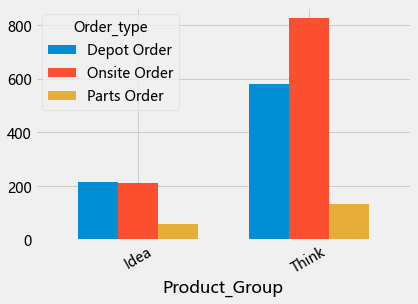

In [11]:
# 绘制计数图表

tb_usage.plot(kind="bar", width=0.7, rot=30)

In [12]:
# 以不同比例进行数据透视

s_usage = df_excel['Order_type'].groupby(df_excel['Product_Group'])\
    .value_counts(normalize=True)
s_usage

Product_Group  Order_type  
Idea           Depot Order     0.442387
               Onsite Order    0.438272
               Parts Order     0.119342
Think          Onsite Order    0.537362
               Depot Order     0.376218
               Parts Order     0.086420
Name: Order_type, dtype: float64

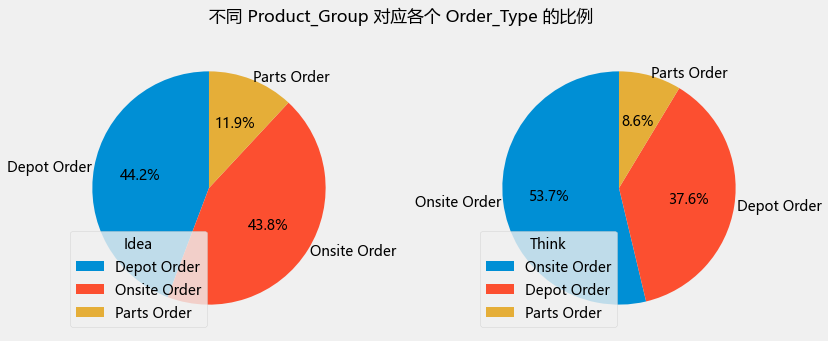

In [13]:
# 绘制百分比饼图

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("不同 Product_Group 对应各个 Order_Type 的比例")

ax1.pie(s_usage.Idea.values, labels=s_usage.Idea.index, startangle = 90,
        labeldistance=1.02, autopct='%.1f%%', pctdistance=0.6)
ax1.legend(title="Idea", loc=3)

ax2.pie(s_usage.Think.values, labels=s_usage.Think.index, startangle = 90,
        labeldistance=1.02, autopct='%.1f%%', pctdistance=0.6)
ax2.legend(title="Think", loc=3)

plt.show()

其实个人不太喜欢饼图，信息量较少且不直观。

下面自定义绘图函数，以条形图展示。

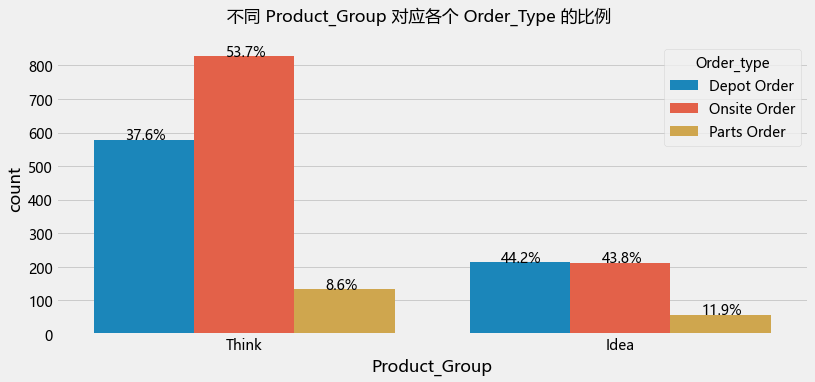

In [14]:
def annotate_with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + \
                patch[(j*Number_of_categories + i)].get_width() / 2 - 0.05
            y = patch[(j*Number_of_categories + i)].get_y() + \
                patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y))
    plt.show()
    
fig, ax = plt.subplots(figsize=(12, 5))
fig.suptitle("不同 Product_Group 对应各个 Order_Type 的比例")

ax = sns.countplot('Product_Group', hue='Order_type', data=df_excel)
annotate_with_hue(ax, df_excel.Product_Group, 2, 3)

## 4. Order_Date - Courier_POD_time 是客户提出备件需求到我们把备件送达客户的时间，用公式 (sumif) 计算各个 Order_Type 的平均送达时间。

In [15]:
# 新建指标 Delivery_time，为平均送达时间

df_order_courier = df_excel.copy()
df_order_courier['Delivery_time'] = df_excel.Courier_POD_time - df_excel.Order_date
df_order_courier

,Item_No,lenovo_SO,Order_type,MTM,Ship_PN,Qty,Order_date,Item_allocated_time,Expect_Pick_time,WH_handle_time,WH_Pack_time,WH_ship_time,Courier_POD_time,Courier_Delv_Time_RET,WH_Recv_time,Return_PN,Category,Product_Group,Delivery_time
0,40,4000010242,Depot Order,20F5S88F00,01HX031,1,2020-03-19 16:32:19,2020-03-19 16:32:00,2020-03-20 16:00:00,2020-03-20 09:07:19,2020-03-20 09:22:40,2020-03-20 09:23:02,2020-03-23 09:00:00,2020-03-26 13:00:00,2020-03-27 11:27:23,01HX035,PLANAR,Think,3 days 16:27:41
1,30,4000010912,Depot Order,20HGS18V00,01ER066,1,2020-03-23 11:17:23,2020-03-23 11:17:00,2020-03-23 16:00:00,2020-03-23 11:28:09,2020-03-23 11:28:27,2020-03-23 11:29:03,2020-03-24 09:00:00,2020-03-26 13:00:00,2020-03-27 11:35:07,01ER066,PLANAR,Think,0 days 21:42:37
2,40,4000011420,Depot Order,20FAS6PN00,01AV462,1,2020-03-24 11:57:13,2020-03-24 11:57:00,2020-03-24 16:00:00,2020-03-24 12:16:58,2020-03-24 12:32:32,2020-03-24 12:33:01,2020-03-25 09:00:00,NaT,NaT,NaN,BATTERY,Think,0 days 21:02:47
6,30,4000011556,Depot Order,20L9CTO1WW,01YR457,1,2020-03-24 15:27:12,2020-03-24 15:23:00,2020-03-24 16:00:00,2020-03-24 15:35:47,2020-03-24 15:36:17,2020-03-24 15:37:02,2020-03-25 11:00:00,NaT,NaT,NaN,MECHA,Think,0 days 19:32:48
7,40,4000011435,Depot Order,20SC001LSG,5B20W72961,1,2020-03-25 12:53:41,2020-03-25 12:53:00,2020-03-25 16:00:00,2020-03-25 13:29:30,2020-03-25 13:35:58,2020-03-25 13:36:04,2020-03-26 09:00:00,2020-04-06 13:00:00,2020-04-08 18:48:14,5B20W72961,PLANAR,Think,0 days 20:06:19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,30,4000015386,Depot Order,20FAS8BU00,00JT959,1,2020-04-06 12:07:18,2020-04-06 12:02:00,2020-04-06 16:00:00,2020-04-06 13:03:40,2020-04-06 13:03:53,2020-04-06 13:04:05,2020-04-07 09:00:00,2020-04-09 13:00:00,2020-04-13 16:16:52,00JT959,PLANAR,Think,0 days 20:52:42
2024,50,4000014370,Depot Order,20FAS6PN00,00JT959,1,2020-04-07 13:03:10,2020-04-07 13:03:00,2020-04-07 16:00:00,2020-04-07 13:29:49,2020-04-07 13:45:43,2020-04-07 13:46:04,2020-04-07 17:45:00,2020-04-13 13:00:00,2020-04-13 17:43:33,00JT959,PLANAR,Think,0 days 04:41:50
2025,60,4000014370,Depot Order,20FAS6PN00,01AV462,1,2020-04-07 13:03:10,2020-04-07 13:03:00,2020-04-07 16:00:00,2020-04-07 13:29:49,2020-04-07 13:45:43,2020-04-07 13:46:04,2020-04-07 17:45:00,2020-04-13 13:00:00,NaT,NaN,BATTERY,Think,0 days 04:41:50
2026,40,4000015844,Depot Order,20LES3481L,02HL897,1,2020-04-07 13:22:16,2020-04-07 13:22:00,2020-04-07 16:00:00,2020-04-07 13:39:07,2020-04-07 14:02:01,2020-04-07 14:03:02,2020-04-08 10:00:00,NaT,NaT,NaN,KEYBOARD,Think,0 days 20:37:44


In [16]:
# 数据透视，平均聚合

tb_delivery = pd.pivot_table(df_order_courier,
                             values='Delivery_time',
                             index='Order_type',
                             columns='Product_Group',
                             aggfunc='mean')

# 融合 Product_Group 为 'All'
tb_delivery['All'] = df_order_courier.groupby('Order_type')['Delivery_time'].mean()
tb_delivery

Product_Group,Idea,Think,All
Order_type,,,
Depot Order,3 days 03:40:58.920930232,1 days 18:55:34.466321243,2 days 03:47:46.151133501
Onsite Order,1 days 12:59:09.164319248,1 days 00:50:21.991535671,1 days 03:19:37.652884615
Parts Order,3 days 19:14:56.982758620,2 days 12:55:55.526315789,2 days 22:08:17.958115183


In [17]:
# Timedelta 换算为小时
tb_delivery = tb_delivery / pd.Timedelta(hours=1)
tb_delivery

Product_Group,Idea,Think,All
Order_type,,,
Depot Order,75.683034,42.926241,51.796153
Onsite Order,36.985879,24.839442,27.327126
Parts Order,91.249162,60.932091,70.138322


Text(0, 0.5, 'Order_Type 的平均送达时间')

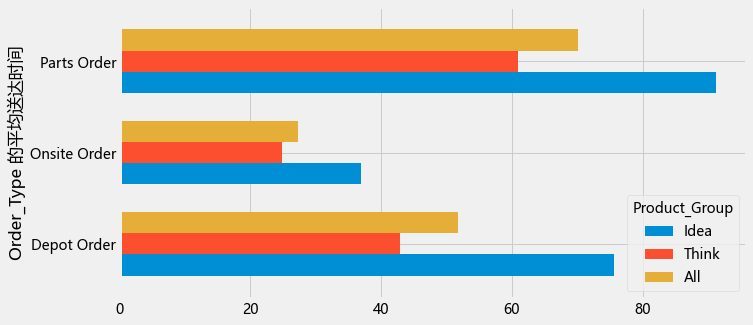

In [18]:
# 绘制条形图展示

barh = tb_delivery.plot(kind='barh', figsize=(10, 5), width=0.7)
barh.set_ylabel("Order_Type 的平均送达时间")
